# Arboles de decision (Clasificacion)

## Entropia

Antes de poder hablar de arboles de decision hay que entender que es la entropia , En los conjuntos de datos pueden existir similitud en el sentido y el orden de estos pero en ciertas ocasiones hay datos que rompen esta linea y es dificil su predicion o especulacion de como seguira el orden de estos

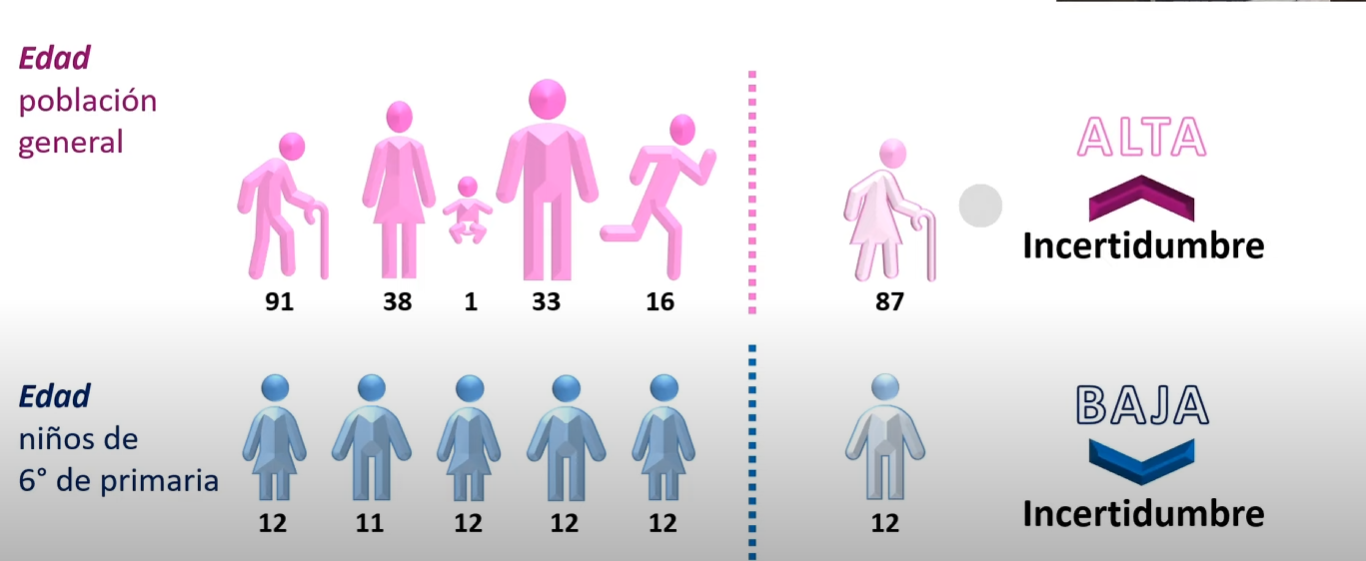

In [594]:
from IPython.display import display,Image

ruta=r"C:\Users\Cristian\PythonLogic\Ciencia de datos y Aprendizaje Automatico\Media\EjemploBasicoEntropia.png"

display(Image(filename=ruta))

Matematicamente se define como una medida de incertidumbre de una variable aleatoria 

La entropía en Machine Learning mide el nivel de desorden o incertidumbre en un conjunto de datos.
Es una métrica que cuantifica la cantidad de información en un conjunto de datos, y se utiliza comúnmente para evaluar la calidad de un modelo y su capacidad para hacer predicciones precisas.

Su formula se define por 

$$H(X) = -\sum_{x𝞊X}^{} P(x_i) \log_2 P(x_i)$$

Donde:

- $H$ es la entropia resultante de los datos
  
- $P(X)$ es la probabilidad de que un suceso x ocurra

- $X$ son los posibles sucesos 

**¿Por qué se usa log2P(x)?**: Cantidad de información en bits

$log_2(2)$ = 1 bit para expresar 2 valores 0 → {0, 1}

$log_2 (4)$ = 2 bits para expresar 4 valores 00 → {00, 01, 10, 11}

$log_2(8)$ = 3 bits para expresar 8 valores  000 → {000, 001, 010, 011, 100, 101, 110, 111}

$log_2(16)$ = 4 bits para expresar 16 valores 0000 → {0000, 0001, ..., 1110, 1111}

$log_2(32)$ = 5 bits para expresar 32 valores 00000 → {00000, 00001, ..., 11110, 11111}


$log_2(64)$ = 6 bits para expresar 64 valores 000000 {000000, 000001, ..., 111110, 111111}


Cuanta cantidad de bits necesitamos para expresar una cantidad aleatoria




**Vamos a hacer el experimento con la probabilidad de un dado justo con 6 caras y en donde hay punntos de 6 tipos [1,2,3,4,5,6]**

Recordando que la formula de probabilidad es 

$Probabilidad=\frac{CasosFavorables}{NumeroCasosPosibles}$

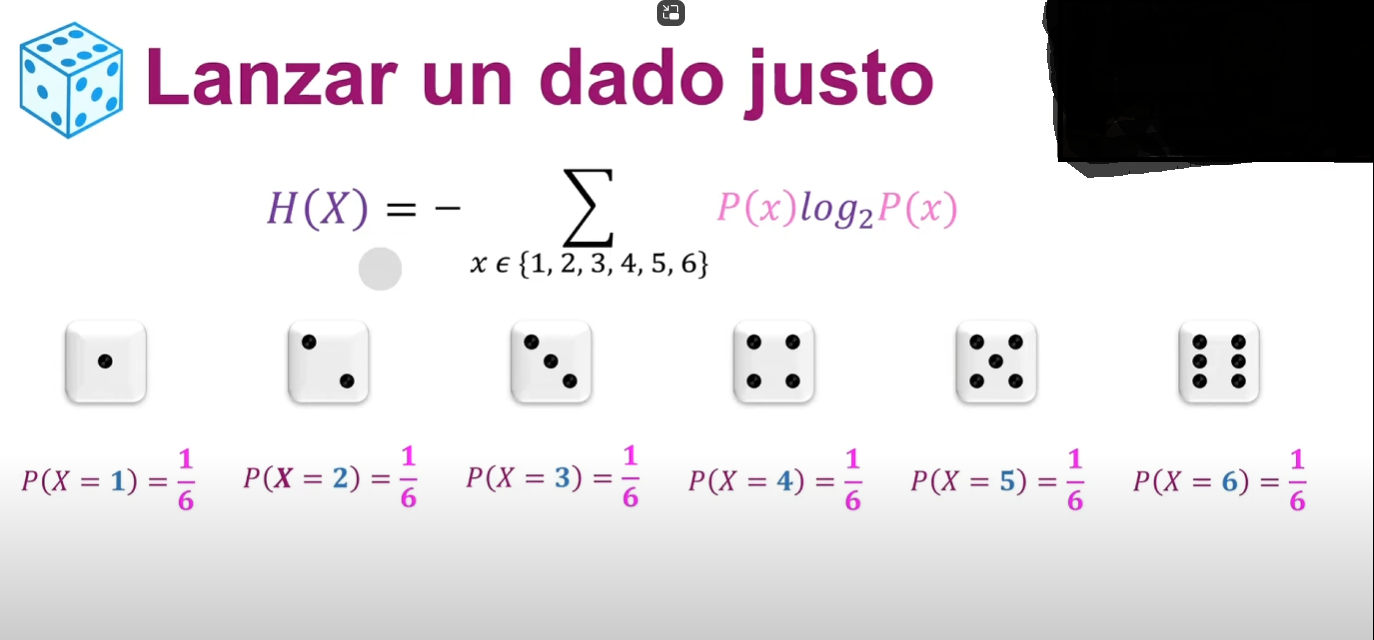

In [595]:
ruta2=r"C:\Users\Cristian\PythonLogic\Ciencia de datos y Aprendizaje Automatico\Media\ProbabilidadEntropia.png"

display(Image(filename=ruta2))

Como se evidencia en este caso que es un dado justo y todas sus caras son iguales, entonces todos tienen la misma probabilidad de salir al lanzar el dado entonces la probabilidad es equivalente y ya con esto podemos probar metiendo esto en nuestra formula de entropia

$$H(X)=-[\frac{1}{6} log_2 \frac{1}{6} + \frac{1}{6} log_2 \frac{1}{6}+\frac{1}{6} log_2 \frac{1}{6}+\frac{1}{6} log_2 \frac{1}{6}+\frac{1}{6} log_2 \frac{1}{6}+\frac{1}{6} log_2 \frac{1}{6}]$$

$$H(X)=2.5849bits$$


**Dado Injusto**

Ahora vamos a hacer un pequeño cambio, aqui vamos a crear un dado injusto en donde las caras de 1 y 2 tienen mas probabilidad de que caigan

Entonces las probabilidades respectivas ahora seran de :


$P(X=1)= \frac{1}{3} , P(X=2)= \frac{1}{3} ,P(X=3)= \frac{1}{3}, P(X=4)= \frac{1}{12}, P(X=5)= \frac{1}{12}, P(X=6)= \frac{1}{12} $

$$H(X)=-[\frac{1}{3} log_2 \frac{1}{3} + \frac{1}{12} log_2 \frac{1}{12}+\frac{1}{12} log_2 \frac{1}{12}+\frac{1}{12} log_2 \frac{1}{12}+\frac{1}{12} log_2 \frac{1}{12}+\frac{1}{12} log_2 \frac{1}{12}]$$

$$H_2(X)=2.2516$$

En este caso, las caras 1 y 2 tienen una probabilidad de 1/3 cada una, lo que suma 2/3. Esto deja 1/3 de la probabilidad restante para ser distribuida entre las caras 3, 4, 5 y 6. Si dividimos este 1/3 restante igualmente entre las 4 caras restantes, obtenemos una probabilidad de 1/12 para cada una


**Dado justo vs Dado injusto**

$$H(X)=2.5849\space H_2(X)=2.2516$$

Con esto se concluye que la incertidumbre del dado justo es mas incierto que valor va caer mientras que el dado justo es menos incierto , pues es mas probable que caigan en los numeros alterados y la incertidumbre se reduce y gasta menos bits




# Ejemplo en python de como hallar la entropia

In [596]:
from scipy.stats import entropy

dado_Justo:list=entropy([1/6,1/6,1/6,1/6,1/6,1/6],base=2) #Todas las probabilidades y la base=2 por ser bits

dado_Injusto:list=entropy([1/3,1/3,1/12,1/12,1/12,1/12],base=2)

print(f"Entropia dado justo: {dado_Justo}")

print(f"Entropia dado injusto: {dado_Injusto}")

#Tambien podemos usar math para hacer la entropia pero ya pondriamos la formula de la sumatoria

Entropia dado justo: 2.584962500721156
Entropia dado injusto: 2.251629167387823


# Arboles de decision con Entropia


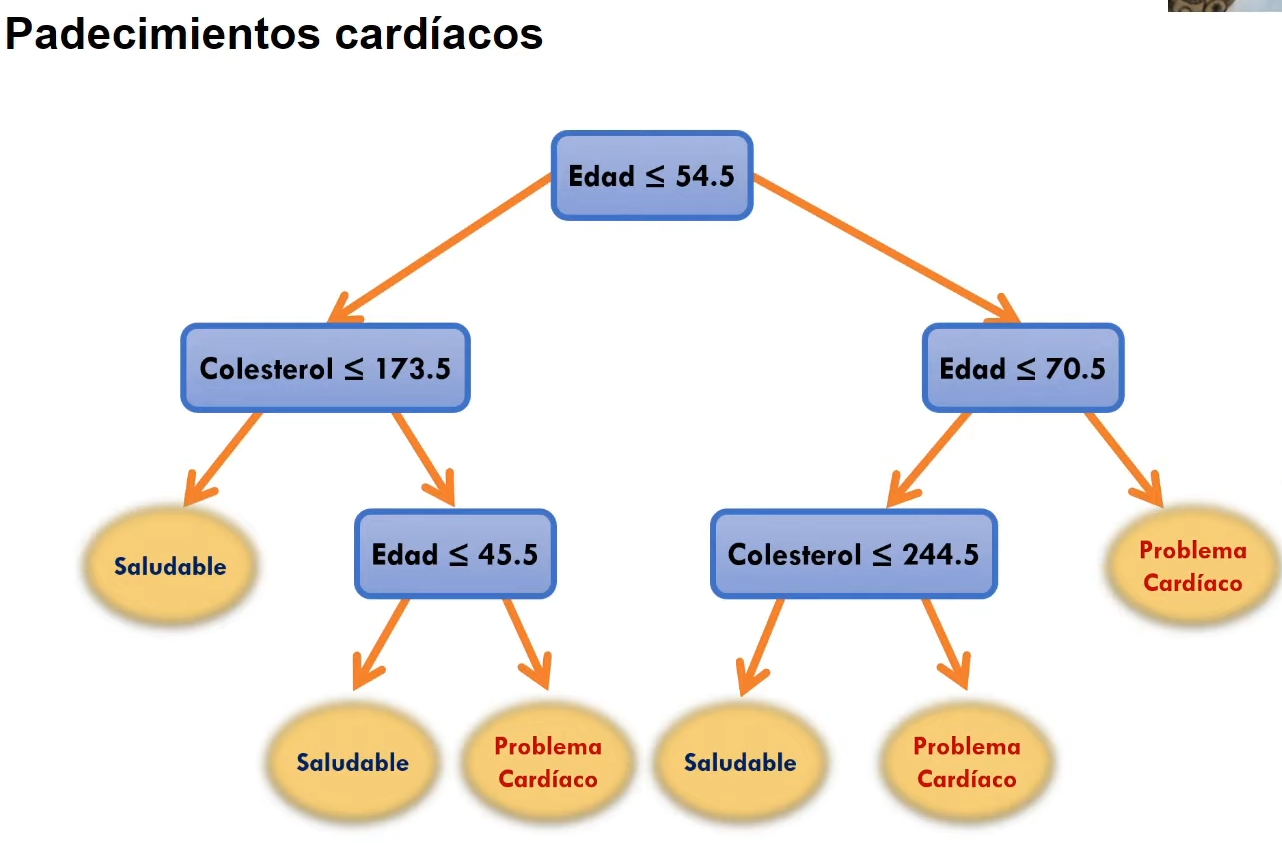

In [597]:
treeroute=r"C:\Users\Cristian\PythonLogic\Ciencia de datos y Aprendizaje Automatico\Media\ArbolDecisionPartes.png"

display(Image(filename=treeroute))

Tenemos un ejemplo de arbol de decision que poblacion puede tener un problema cardiaco en funcion a la cantidad de colesterol que tienen en su sangre

Este arbol se compone de 2 nodos:

1) **Nodo de decision**: Aquellos nodos de color azul que plantean un tipo a analizar y un condicional para ver que camino debe de tomar el arbol

2) **Nodo de clase o terminal**: Las clases de las instancias de decision que puede tener un nodo, en este caso un paciente que puede ser saludable o problema cardiaco

 

In [598]:
import pandas as pd

import matplotlib.pyplot as plt

route_csv=r"\Users\Cristian\PythonLogic\Ciencia de datos y Aprendizaje Automatico\Media\pacientes.csv"

data=pd.read_csv(route_csv)

data.head(30)

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1
5,57,192,1
6,56,294,1
7,44,263,1
8,52,199,1
9,57,168,1


In [599]:
print(data.shape)

print(data.columns.values)


(300, 3)
['edad' 'colesterol' 'problema_cardiaco']


In [600]:

sanos=data[data["problema_cardiaco"]==0]

enfermos=data[data["problema_cardiaco"]==1]

sanos

,edad,colesterol,problema_cardiaco
165,67,286,0
166,67,229,0
167,62,268,0
168,63,254,0
169,53,203,0
...,...,...,...
295,63,187,0
296,63,197,0
297,59,176,0
298,57,241,0


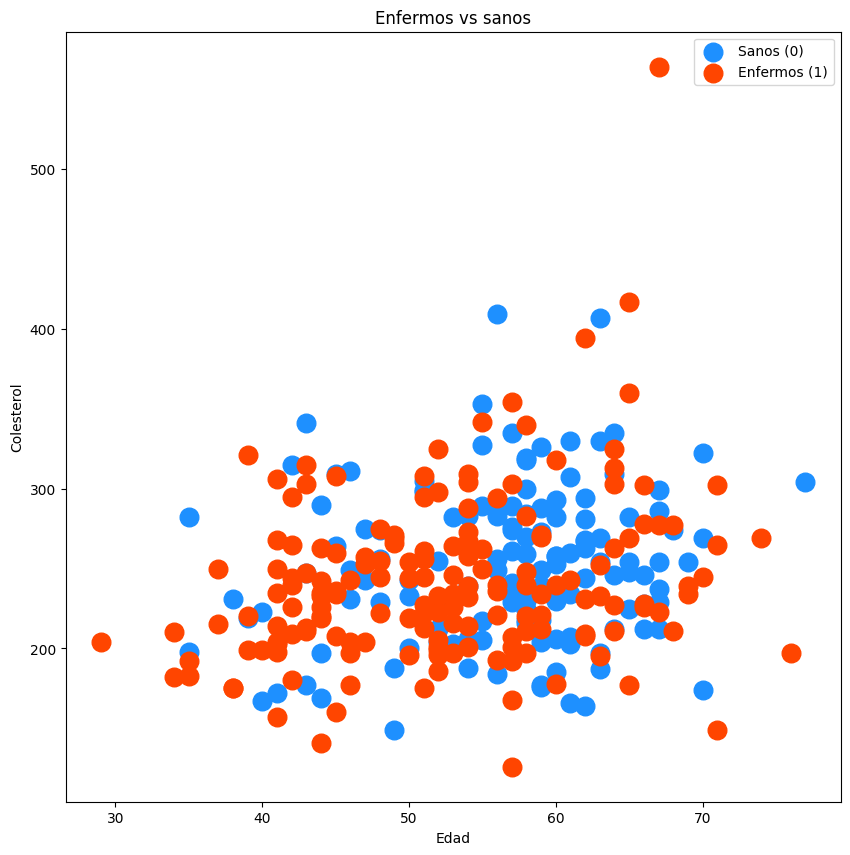

In [601]:
plt.figure(figsize=(10,10))

plt.scatter(sanos["edad"],sanos["colesterol"],color="dodgerblue",label="Sanos (0)",s=180)

plt.scatter(enfermos["edad"],enfermos["colesterol"],color="orangered",label="Enfermos (1)",s=180)

plt.xlabel("Edad")

plt.ylabel("Colesterol")

plt.legend()

plt.title("Enfermos vs sanos")

plt.show()

Estos datos son de tipo no linealmente separables

In [602]:
edades=pd.Series([40,20,30,50])

colesterol=pd.Series([100,110,100,110])

probabilidad_edades=(edades.value_counts()/edades.size) #Usando la formula de probabilidad

probabilidad_colesterol=colesterol.value_counts()/colesterol.size #Lo mismo para el colesterol

In [603]:
palabras="Edad y probabilidad de que este"

print("Edad y probabilidad de que este")
print(probabilidad_edades)

print("-" * len(palabras))

print("Colesterol y posibilidad que salga")
print(probabilidad_colesterol)

print("-" * len(palabras))

print(f"La entropia de las edades es: {entropy(probabilidad_edades,base=2)}")

print(f"La entropia del colesterol es: {entropy(probabilidad_colesterol,base=2)}")


Edad y probabilidad de que este
40    0.25
20    0.25
30    0.25
50    0.25
Name: count, dtype: float64
-------------------------------
Colesterol y posibilidad que salga
100    0.5
110    0.5
Name: count, dtype: float64
-------------------------------
La entropia de las edades es: 2.0
La entropia del colesterol es: 1.0


Podemos evidenciar que la entropia es mas alta en las edades por lo tanto hay mas caos en el incertidumbre de saber que edad va a tener el paciente a analizar mientras que en el colesterol es menor y puede predecirse mas facil su comportamiento, del analisis de que **la entropia es mayor en la edad** se crea el arbol que tenemos arriba

In [604]:
from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report

x_train , x_test , y_train , y_test=train_test_split(data[["edad","colesterol"]],data[["problema_cardiaco"]],test_size=0.30,random_state=37)


In [605]:
decisionTree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2) #Max_depth es la profundidad del arbol (Niveles)

treefit=decisionTree.fit(x_train,y_train)

tree

<module 'sklearn.tree' from 'C:\\Users\\Cristian\\AppData\\Roaming\\Python\\Python311\\site-packages\\sklearn\\tree\\__init__.py'>

In [606]:
accurancy=decisionTree.score(x_test,y_test)

print(accurancy)

print(tree.export_text(treefit,feature_names=["edad","colesterol"])) #Recibe un arbol entrenado  y las etiquetas que tienen el dataset



0.6555555555555556
|--- edad <= 54.50
|   |--- colesterol <= 333.00
|   |   |--- class: 1
|   |--- colesterol >  333.00
|   |   |--- class: 0
|--- edad >  54.50
|   |--- edad <= 63.50
|   |   |--- class: 0
|   |--- edad >  63.50
|   |   |--- class: 1



[Text(0.5, 0.8333333333333334, 'edad <= 54.5\nentropy = 0.993\nsamples = 210\nvalue = [95, 115]'), Text(0.25, 0.5, 'colesterol <= 333.0\nentropy = 0.9\nsamples = 98\nvalue = [31, 67]'), Text(0.125, 0.16666666666666666, 'entropy = 0.892\nsamples = 97\nvalue = [30, 67]'), Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.75, 0.5, 'edad <= 63.5\nentropy = 0.985\nsamples = 112\nvalue = [64, 48]'), Text(0.625, 0.16666666666666666, 'entropy = 0.939\nsamples = 73\nvalue = [47, 26]'), Text(0.875, 0.16666666666666666, 'entropy = 0.988\nsamples = 39\nvalue = [17, 22]')]


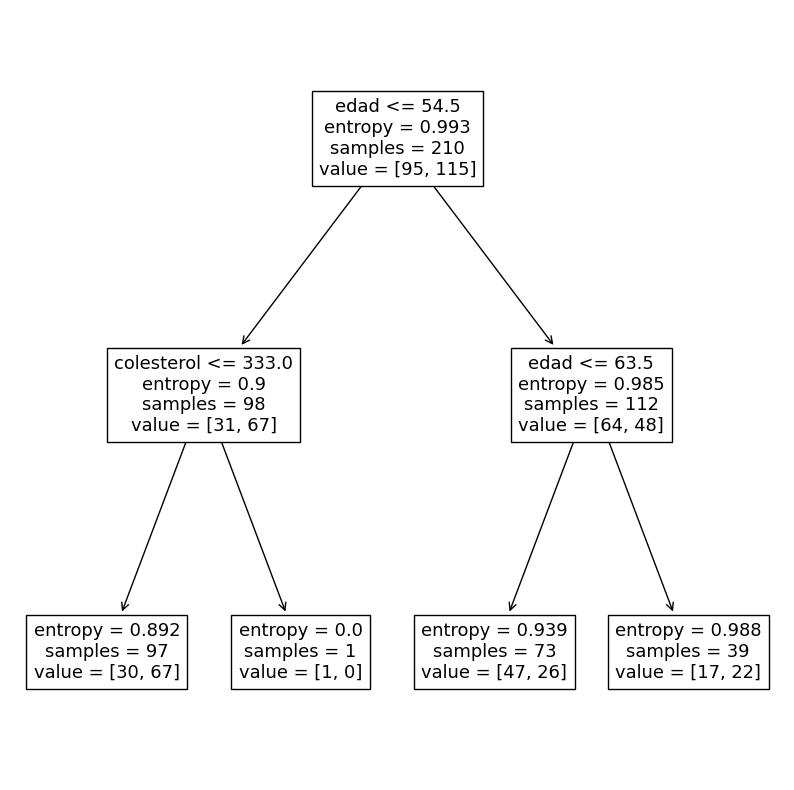

In [607]:
plt.figure(figsize=(10,10))

print(tree.plot_tree(treefit,feature_names=["edad","colesterol"]))

plt.show()

## Clasificamos una persona en nuestro arbol

In [608]:
prediccion=decisionTree.predict([[57,241]])

print(prediccion)


[0]


C:\Users\Cristian\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Cuando se le quita el parametro max_depth se crean las ramas necesarias para que se entrene adecuadamente , su accurancy baja y se sobreajusta a los datos de entrenamiento, esto es un problema que existe en los arboles pero puede ser resuelto con varias tecnicas de machine learning y matematicas , random forest . . .


# Matriz de confusion

In [609]:
predict=decisionTree.predict(x_test)


matrix=confusion_matrix(y_test,predict)

print(matrix)

[[21 19]
 [12 38]]


In [612]:
report=classification_report(y_test,predict)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        40
           1       0.67      0.76      0.71        50

    accuracy                           0.66        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.65      0.66      0.65        90



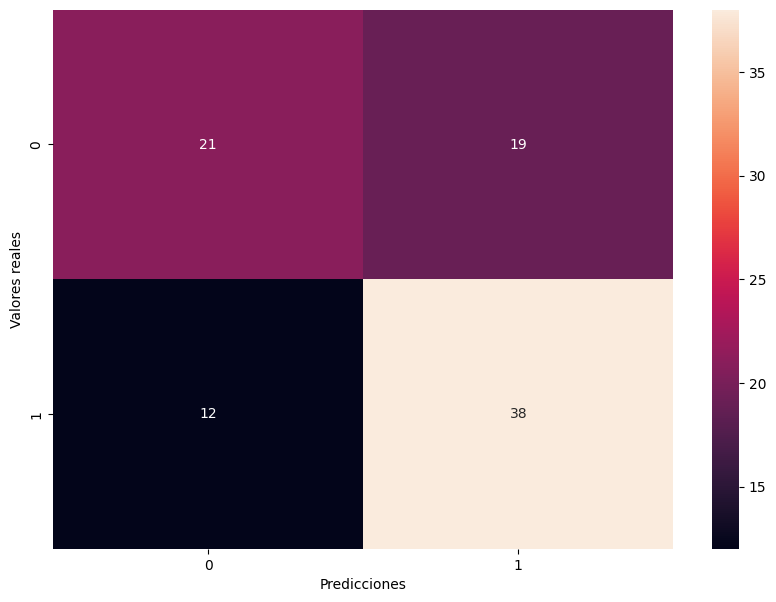

In [613]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()